# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head())
powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis=1, inplace = True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
display(heroes_df.describe())
powers_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Hulk,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
`heroes_df` has 15 missing values for Publisher and 2 missing values for Weight. Since Publisher is a categorical variable, and only 15/734 = 2% of the data is missing, it is reasonable to leave them as is for now. Removing the row with missing values is also an otpion, but removing data should be the last option to consider. The 2 missing values in Weight are replaced by median weight.

`powers_df` does not have any missing values.


In [5]:
heroes_df.isna().any()
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [6]:
heroes_df.Weight.fillna(heroes_df.Weight.median(), inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [7]:
powers_df.isna().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [8]:
powers_df.isna().any().any()

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [9]:
joined_df = heroes_df.set_index('name').join(powers_df.set_index('hero_names'), how='inner')
joined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [10]:
joined_df.Gender.value_counts()

Male      464
Female    178
-          18
Name: Gender, dtype: int64

In [11]:
joined_f = joined_df[joined_df.Gender == 'Female']
joined_m = joined_df[joined_df.Gender == 'Male']

display(joined_f.info())
joined_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, Angel Dust to Zatanna
Columns: 176 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 42.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, A-Bomb to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 111.9+ KB


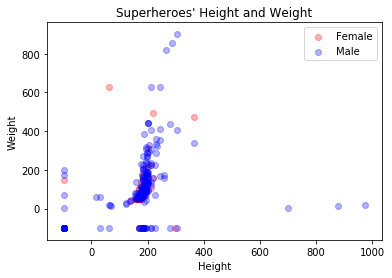

In [12]:
plt.scatter(joined_f.Height, joined_f.Weight, c='Red', alpha=0.3)
plt.scatter(joined_m.Height, joined_m.Weight, c='Blue', alpha=0.3)
plt.title("Superheroes' Height and Weight")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(['Female', 'Male'])
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [13]:
male_heroes_df = joined_m
female_heroes_df = joined_f


def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name])
    plt.xlim(dataframe[column_name].min(), dataframe[column_name].max())
    plt.title(f'Distribution of {column_name} for {gender} Heroes')
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')

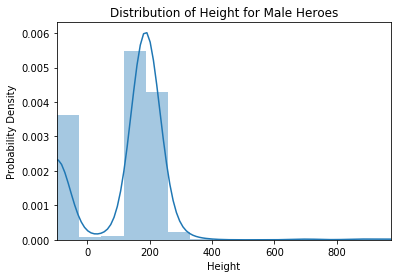

In [14]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

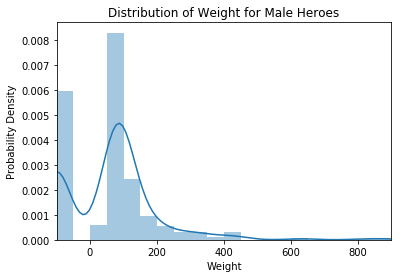

In [15]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

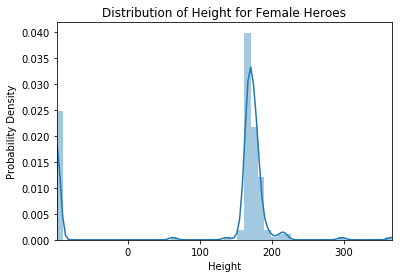

In [16]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

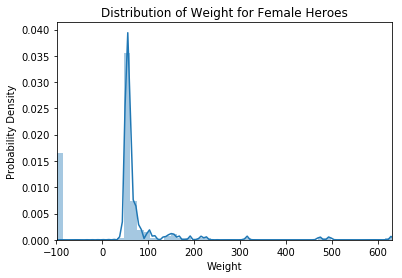

In [17]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

There are negative outliers for all four distributions. Based on the original dataset, it seems like missing Height and Weight values were inputted as -99 (in addition to 2 NaN Weight values). If these outliers are correctly treated as missing, then the mean would increase.

In [18]:
male_heroes_df2 = male_heroes_df[(male_heroes_df['Height']>0) & (male_heroes_df['Weight']>0)]
female_heroes_df2 = female_heroes_df[(female_heroes_df['Height']>0) & (female_heroes_df['Weight']>0)]

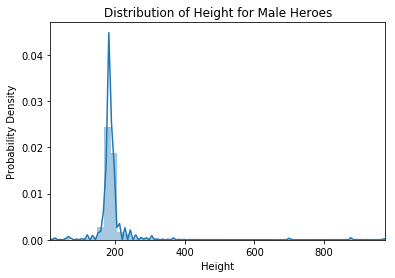

In [19]:
show_distplot(male_heroes_df2, 'Male', 'Height')

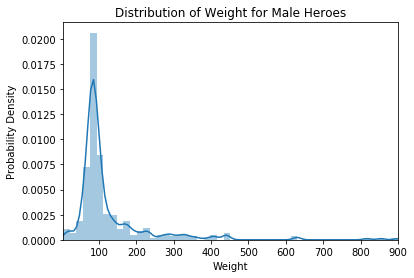

In [20]:
show_distplot(male_heroes_df2, 'Male', 'Weight')

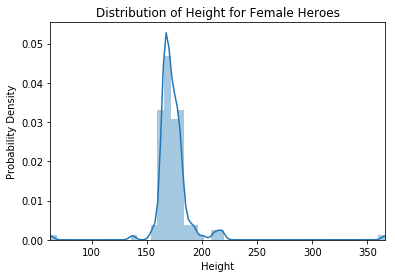

In [21]:
show_distplot(female_heroes_df2, 'Female', 'Height')

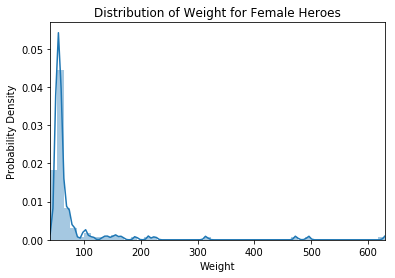

In [22]:
show_distplot(female_heroes_df2, 'Female', 'Weight')

After accounting for negative outliers, all four distributions are fairly normally distributed. 

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [23]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    for col in df.columns.values:
        df[col] = df[col].map({True:1, False: 0})
    power_count = dict(df.sum())
    return sorted(power_count.items(), key=lambda x: x[1], reverse=True)[:5] 

In [24]:
top_5_overall = top_5_powers(joined_df)

In [25]:
top_5_marvel = top_5_powers(joined_df[joined_df['Publisher'] == 'Marvel Comics'])

In [26]:
top_5_DC = top_5_powers(joined_df[joined_df['Publisher'] == 'DC Comics'])

In [27]:
def top_5_graph(top_5_list, publisher=None):
    power = [i[0] for i in top_5_list]
    values = [i[1] for i in top_5_list]
    plt.bar(power, values)
    if publisher:
        plt.title(f'Top 5 Powers in {publisher} Universe')
    else:
        plt.title('Top 5 Powers in Overall')
    plt.xlabel('Powers')
    plt.show()

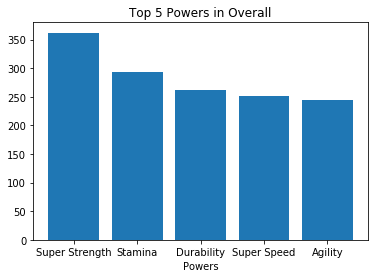

In [28]:
top_5_graph(top_5_overall)

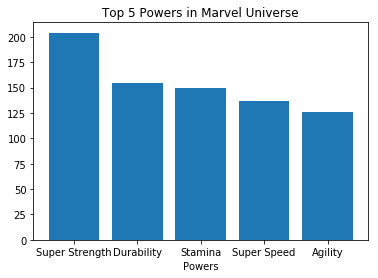

In [29]:
top_5_graph(top_5_marvel, publisher='Marvel')

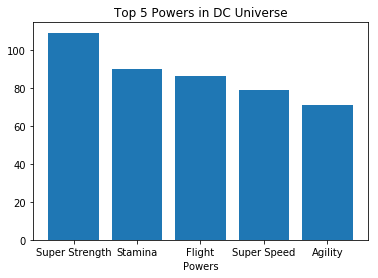

In [30]:
top_5_graph(top_5_DC, publisher='DC')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
The top 5 powers in the Marvel and DC universes are similar, also compared to the overall trends. Super Strength is the most popular power in the Marvel, DC universes and the entire Superheroes dataset. Stamina, Super Speed, Agility are also popular in all three datasets.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [31]:
# Distribution of skin colors amongst alien heros
alien = joined_df[(joined_df['Race'] != 'Human') & (joined_df['Race'] != '-')]
alien.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,-,bad,90.0,True,...,False,False,False,False,False,False,False,False,False,False


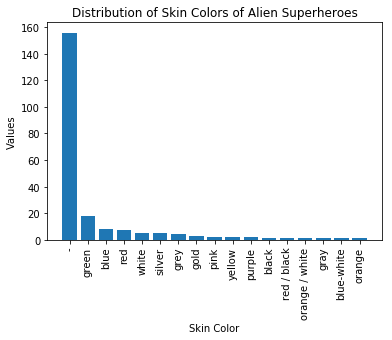

In [32]:
alien['Skin color'].value_counts() # Majority of the skin color is missing

skin_colors = alien['Skin color'].unique()
dict = {}
for color in skin_colors:
    dict[color] = len(alien[alien['Skin color'] == color])
    
dict = sorted(dict.items(), key= lambda x: x[1], reverse=True)

x = [i[0] for i in dict]
y = [i[1] for i in dict]
plt.bar(x, y)
plt.title('Distribution of Skin Colors of Alien Superheroes')
plt.xlabel('Skin Color')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Excluding missing skin colors, green is the most common skin color among alien superheroes.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data